<a href="https://colab.research.google.com/github/Light047/LangChain/blob/main/pytorch_in_MNIST_recurrent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we introduce Pytorch as Numpy can't use GPU. As we need faster smalller calculations having more cores is a huge advantage.

In [ ]:
!pip3 install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
#torch allows easy manipulation on arrays
import torch
x = torch.Tensor([5, 3]) #
y = torch.Tensor([2, 1])
print(x*y)
y = torch.rand(5, 2) #
print(y)
y = y.view(10, 1) #
y

tensor([10.,  3.])
tensor([[0.2173, 0.2461],
        [0.2025, 0.5233],
        [0.4776, 0.8696],
        [0.0934, 0.3360],
        [0.8445, 0.8073]])


tensor([[0.2173],
        [0.2461],
        [0.2025],
        [0.5233],
        [0.4776],
        [0.8696],
        [0.0934],
        [0.3360],
        [0.8445],
        [0.8073]])

In [ ]:
#dataset
import torch
import torchvision
from torchvision import transforms, datasets


In [ ]:
train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

100%|██████████| 9912422/9912422 [00:00<00:00, 115280581.74it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24149859.22it/s]


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33189800.05it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5899823.09it/s]


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [ ]:
trianset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [ ]:
#trian_set contains 1. tensor of tensor of images anf tensor of tensor of labels
for data in trianset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x, y = data[0][0], data[1][0] #tensor of image / tensor of labels
print(y)

tensor(9)


torch.Size([1, 28, 28])


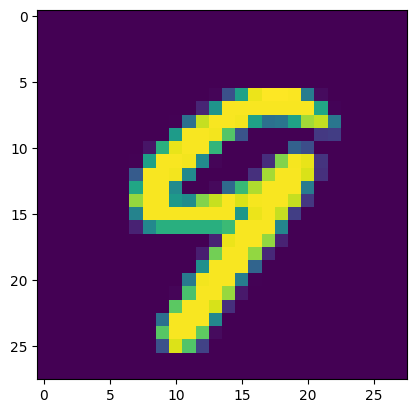

In [ ]:
import matplotlib.pyplot as plt
print(data[0][0].shape)  #shows shape of image
plt.imshow(data[0][0].view(28, 28))
plt.show()

In [ ]:
#balancing dataset  #getting which data occurs how much time o that machine doesnt generalize any number which ovvurs most of the time.
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
for data in trianset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
    total += 1
print(counter_dict)

for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [17]:
#building nn using torch
import torch
import torch.nn as nn #initialization
import torch.nn.functional as F #function with parameter
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True, transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

class Net(nn.Module):
  def __init__(self):
    super().__init__()  #running initialization / inherit methods of torch.nn
    self.fc1 = nn.Linear(28*28, 64) #nn.Linear(input, output) # input - passing flatten image . output - layer of 64 neuron
    self.fc2 = nn.Linear(64, 64) #hidden_layer
    self.fc3 = nn.Linear(64, 64) #hidden_layer
    self.fc4 = nn.Linear(64, 10) #output_layer

  def forward(self, x): #FORWARD PROPAGATION
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) #dim= 0(distribution across batches); dim=1 across output LAYER
net = Net()
print(net)

X = torch.rand(28*28)

X = X.view(-1, 28*28) #flatten image

output = net(X)
print('\nprediction:', output)

# now passing labeled data ; TRAINING_model /optimizer[ net.parameter, learning_rate] for loss
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.001) #1e-3 #decaying learning rate
EPOCHS = 3 #a full pass through data is called EPOCHS
for epoch in range(EPOCHS):
  for data in trainset:
    #data is a batch of feautures_sets and Lables
    X, y = data
    #print('\nBatch:', y)
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y) #nll_loss for scalar value other wise one hot vector and calc. mean square
    loss.backward() #back_propagate the loss
    optimizer.step()
  print(loss)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

prediction: tensor([[-2.4081, -2.2706, -2.2136, -2.3526, -2.3167, -2.3692, -2.2673, -2.3224,
         -2.3079, -2.2157]], grad_fn=<LogSoftmaxBackward0>)
tensor(0.0398, grad_fn=<NllLossBackward0>)
tensor(0.0091, grad_fn=<NllLossBackward0>)
tensor(0.0015, grad_fn=<NllLossBackward0>)


In [18]:
#check correctness
correct = 0
total = 0
with torch.no_grad(): #allows not to calculate gradient
  for data in testset:
    X, y = data
    output = net(X.view(-1, 28*28))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]: #comparing argmax to index value
        correct += 1
      total += 1
print("Accuracy: ", round(correct/total, 3))



Accuracy:  0.968


In [19]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

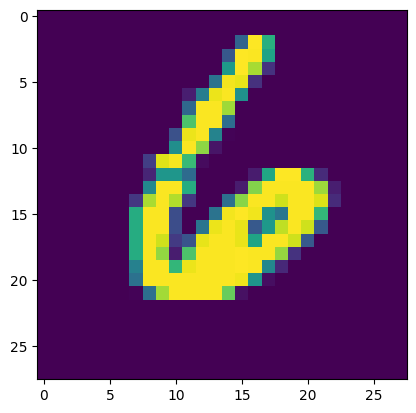

In [23]:
import matplotlib.pyplot as plt
plt.imshow(X[2].view(28,28))
plt.show()


In [26]:
print(torch.argmax(net(X[2].view(-1, 28*28))[0]))

tensor(6)


__Above we made a Recurrent-NN which has supervised dataset which is not in general scenario.__
Now we build CNN ( convolution nerual network ) for sequential type data.
 Passing image(pixels) in org. form , as it accept 2-d,3-d model unlike recurrent.
 1 _Convolution__ :
 1.1 Goal to loacte features of image. we make [nXn] size convolution filters{(window)}(called kernel).
1.2 Generates scalar number.
1.3 Iterate over entire image the filters to find features.
1.4 Max pulling : pull out max value inside the window
__Drastically simplifying image and extracting features._____
1st layer finds combination of pixels, like{corner , edge , curves }
next layer shows combinations of corners, edges, curves.